# IMPORTING LIBRARIES

In [46]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# READING DATA


In [2]:
df=pd.read_csv('superstoredata.csv',encoding='unicode_escape')

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Unnamed: 24'],
      dtype='object')

In [4]:
df.drop('Unnamed: 24',inplace=True,axis='columns')

# CHECKING FOR NULL VALUES IN THE COLUMNS

In [5]:
df.isnull().any()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [6]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01/01/2011,06/01/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,01/01/2011,05/01/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,01/01/2011,05/01/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31/12/2014,04/01/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31/12/2014,05/01/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31/12/2014,02/01/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31/12/2014,06/01/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


### CONVERTING ORDER DATE INTO DATE FORMAT AND MAKING IT INDEX

In [7]:
df['Date']=pd.to_datetime(df['Order Date'])

In [8]:
df['Date']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: Date, Length: 51290, dtype: datetime64[ns]

In [9]:
df.Date.isnull().any()

False

In [10]:
df.index=df.Date

In [11]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Date
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,42433,AG-2011-2040,01/01/2011,06/01/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,2011-01-01
2011-01-01,22253,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,2011-01-01
2011-01-01,48883,HU-2011-1220,01/01/2011,05/01/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,2011-01-01
2011-01-01,11731,IT-2011-3647632,01/01/2011,05/01/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,2011-01-01
2011-01-01,22255,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,32593,CA-2014-115427,31/12/2014,04/01/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014-12-31
2014-12-31,47594,MO-2014-2560,31/12/2014,05/01/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014-12-31
2014-12-31,8857,MX-2014-110527,31/12/2014,02/01/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,2014-12-31


### EXTRACTING YEAR,WEEK,DAY OF THE MONTH AND DAY OF THE WEEK FROM THE INDEX

In [12]:
df['Year']=df.Date.dt.year
df['Week']=df.Date.dt.week
df['Day']=df.Date.dt.day
df['WeekDay']=df.Date.dt.dayofweek

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Date', 'Year', 'Week',
       'Day', 'WeekDay'],
      dtype='object')

### PLOTTING WEEKLY STATISTICS

Text(0.5, 1.0, 'Weekly Sales Statistics')

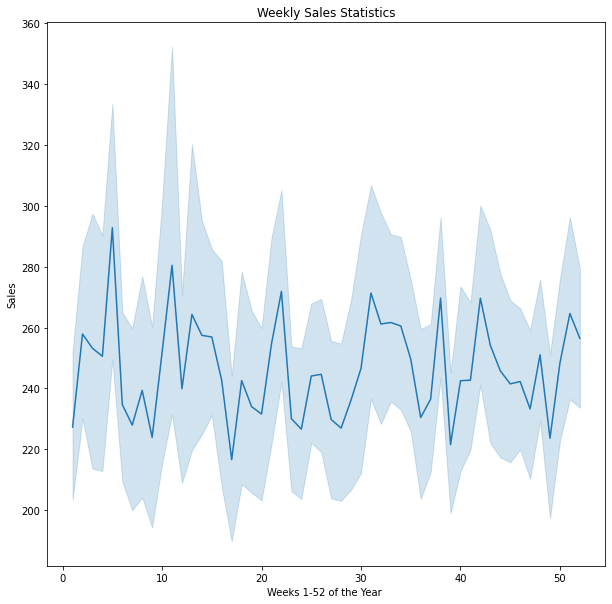

In [66]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Week'],df['Sales'])
plt.xlabel('Weeks 1-52 of the Year ')
plt.title('Weekly Sales Statistics')

### PLOTTING YEARLY STATISTICS

Text(0.5, 1.0, 'Yearly Sales Statistics')

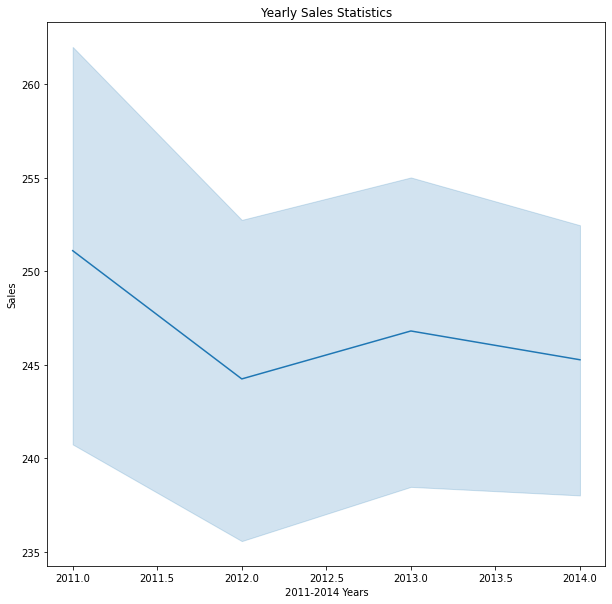

In [67]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Year'],df['Sales'])
plt.xlabel("2011-2014 Years")
plt.title('Yearly Sales Statistics')

### PLOTTING MONTHLY STATISTICS

Text(0.5, 1.0, ' Sales Statistics of a month')

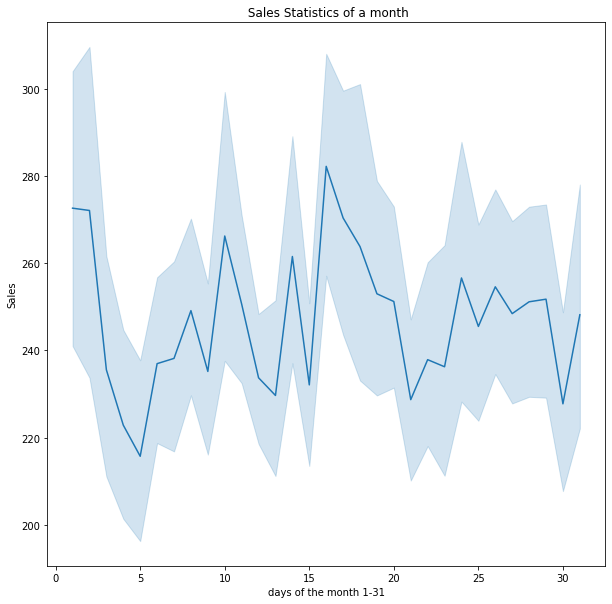

In [71]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Day'],df['Sales'])
plt.xlabel("days of the month 1-31")
plt.title(' Sales Statistics of a month')

### PLOTTING SALES PER DAY IN A WEEK

Text(0.5, 1.0, ' Sales Statistics of Week Days')

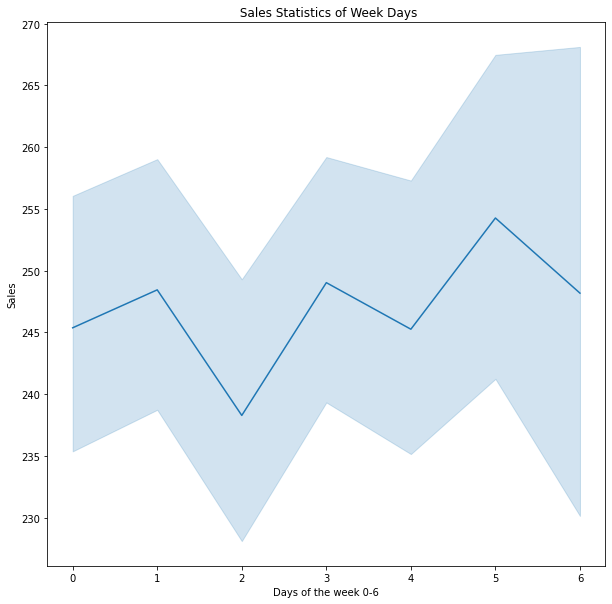

In [72]:
plt.figure(figsize=(10,10))
sns.lineplot(df['WeekDay'],df['Sales'])
plt.xlabel("Days of the week 0-6")
plt.title(' Sales Statistics of Week Days')

In [18]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Date', 'Year', 'Week',
       'Day', 'WeekDay'],
      dtype='object')

In [19]:
df[['Year', 'Week', 'Year', 'WeekDay']]

,Year,Week,Year,WeekDay
Date,,,,
2011-01-01,2011,52,2011,5
2011-01-01,2011,52,2011,5
2011-01-01,2011,52,2011,5
2011-01-01,2011,52,2011,5
2011-01-01,2011,52,2011,5
...,...,...,...,...
2014-12-31,2014,1,2014,2
2014-12-31,2014,1,2014,2
2014-12-31,2014,1,2014,2


## DEFINING MODELS

In [20]:
rf=RandomForestRegressor()
lr=LinearRegression()

## CREATING X AND Y DATASET FOR TRAINING

In [21]:
x=df[['Discount','Profit','Week']]
y=df.Sales

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [76]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
rf.score(x_test,y_test)

0.6484709057669125

In [78]:
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
lr.score(x_test,y_test)

0.25604525693421354

### Hyperparameter Tuning for Random Forest and Linear Regression

In [80]:


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {                       
                'normalize': [True, False]          ## parameter used in linear regression is normalize 
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),        
            'params': {
                'n_estimators': [100,200]          ## parameter used in Random Forest is n_estimator   
                }
        },
        
        }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train,y_train)

,model,best_score,best_params
0,linear_regression,0.192228,{'normalize': True}
1,Random_forest,0.669197,{'n_estimators': 200}


### SHOWING CORRELATION BETWEEN THE FEATURES AND THE SALES

In [26]:
## creating a dataframe just to show how features correlate with the sales

corr_list=[]
for i in x:
    c=df['Sales'].corr(df[i])
    corr_list.append(c)   

In [27]:
corr_df=pd.DataFrame(index=x.columns,data=corr_list,columns=['Sales'])

In [28]:
corr_df

,Sales
Discount,-0.086722
Profit,0.484918
Week,0.000758


### FUNCTIONS FOR PREDICTIONS

In [48]:
## in this function enter the discount along with your profit and enter the week of the year you want to get an estimate
## it will return sales approximate according to the the parameters

def weeklyprediction(discount,profit, weekoftheyear):
    return rf.predict([[discount,profit,weekoftheyear]])

In [30]:
weeklyprediction(0.4,100,2)

array([1129.253558])

In [31]:
##in this function enter the discount along with your profit and enter the month of the year you want to get an estimate
## it will return sales approximate for that month according to the the parameters

def monthly_prediction(discount,profit,monthoftheyear):
     #weeks = monthoftheyear × 4.348125;
    startlimit=int((monthoftheyear-1)*4.348125)
    endlimit=int((monthoftheyear)*4.348125);
    sales=0
    for i in range(startlimit,endlimit):
        sales=sales+rf.predict([[discount,profit,i]])
    return sales    

In [32]:
monthly_prediction(0.1,200,3) 

array([5111.98413])

## Creating a datacolumn FOR CALCULATION OF PERFORMANCE METRICS

In [33]:
## creating columns for precision,recall and f1
## considering 1 if the predicted value is more the 75% of the actual value otherwise 0

df['Onesandzeroes']=0

In [34]:
c=0
for i in rf.predict(x):
    if i>y[c]*0.7:
        df['Onesandzeroes'][c]=1
    c=c+1

In [35]:
df['Onesandzeroes'].value_counts()

1    49409
0     1881
Name: Onesandzeroes, dtype: int64

In [36]:
df["ones"]=1

### Performance metrics

#### Accuracy

Random Forest

In [81]:
rf.score(x_test,y_test)

0.6484709057669125

Linear regression

In [82]:
lr.score(x_test,y_test)

0.25604525693421354

#### MSE

Random Forest

In [83]:
mean_squared_error(y_test,rf.predict(x_test))

99684.54655704284

Linear regression


In [84]:
mean_squared_error(y_test, lr.predict(x_test))

210966.2967819689

#### MAE

RF

In [85]:
mean_absolute_error(y_train,rf.predict(x_train))

47.79043501192264

LR

In [86]:
mean_absolute_error(y_train, lr.predict(x_train))

220.4778062818861

#### Cross val score

RF


In [87]:
print(cross_val_score(rf,x_test,y_test,cv=3))

[0.57283785 0.53930107 0.48405112]


LR

In [88]:
print(cross_val_score(lr,x_test,y_test,cv=3))

[0.28351372 0.4236164  0.0277782 ]


#### Precision , Recall ,F1-score, r2-score

Random Forest

In [89]:
r2_score(y_test,rf.predict(x_test))

0.6484709057669125

In [91]:
r2_score(y_test,lr.predict(x_test))

0.25604525693421354

In [92]:
truth=df['ones']
predicted=df['Onesandzeroes']
classification_report(truth,predicted)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       1.00      0.84      0.91     51290\n\n    accuracy                           0.84     51290\n   macro avg       0.50      0.42      0.46     51290\nweighted avg       1.00      0.84      0.91     51290\n'

Linear regression

In [55]:
df['Onesandzeroes']=0

In [56]:
c=0
for i in lr.predict(x):
    if i>y[c]*0.7:
        df['Onesandzeroes'][c]=1
    c=c+1

In [57]:
df['Onesandzeroes'].value_counts()

1    42843
0     8447
Name: Onesandzeroes, dtype: int64

In [60]:
truth=df['ones']
predicted=df['Onesandzeroes']
classification_report(truth,predicted)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       1.00      0.84      0.91     51290\n\n    accuracy                           0.84     51290\n   macro avg       0.50      0.42      0.46     51290\nweighted avg       1.00      0.84      0.91     51290\n'